In [1]:
import email
import os
from bs4 import BeautifulSoup
import io
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import numpy as np
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
import os
import tarfile
from six.moves import urllib
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import svm, datasets

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ksnss\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ksnss\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Downloading the files from given link and unzipping them

HAM_URL = "http://spamassassin.apache.org/old/publiccorpus/20030228_easy_ham.tar.bz2"
SPAM_URL = "http://spamassassin.apache.org/old/publiccorpus/20030228_spam.tar.bz2"
SPAM_PATH = os.path.join("datasets", "spam")
 
def fetch_spam_data(spam_url=SPAM_URL, spam_path=SPAM_PATH):
    if not os.path.isdir(spam_path):
        os.makedirs(spam_path)
    for filename, url in (("ham.tar.bz2", HAM_URL), ("spam.tar.bz2", SPAM_URL)):
        path = os.path.join(spam_path, filename)
        if not os.path.isfile(path):
            urllib.request.urlretrieve(url, path)
        tar_bz2_file = tarfile.open(path)
        tar_bz2_file.extractall(path=SPAM_PATH)
        tar_bz2_file.close()

In [3]:
ham_files_location = os.path.join(SPAM_PATH, "easy_ham")
spam_files_location = os.path.join(SPAM_PATH, "spam")
ham_filenames = [name for name in sorted(os.listdir(ham_files_location)) if len(name) > 20]
spam_filenames = [name for name in sorted(os.listdir(spam_files_location)) if len(name) > 20]

In [4]:
print(len(ham_filenames))#number of ham email files
print(len(spam_filenames))#number of spam email files

2500
500


In [5]:
def parse_email(fol_path):
    for file in os.scandir(fol_path):
        with open(file.path, 'rb') as f:
            msg = email.message_from_bytes(f.read())
            print(msg)
        break



In [6]:
#Reading content of a ham file
parse_email(ham_files_location)

Return-Path: <exmh-workers-admin@spamassassin.taint.org>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36
	for <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)
Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for
    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100
Received: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002
    07:35:02 -0400 (EDT)
Delivered-To: exmh-workers@listman.spamassassin.taint.org
Received: from int-mx1.corp.spamassassin.taint.org (int-mx1.corp.spamassassin.taint.org


In [7]:
#Reading content of a spam file
parse_email(spam_files_location)

Return-Path: <12a1mailbot1@web.de>
Delivered-To: zzzz@localhost.spamassassin.taint.org
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.spamassassin.taint.org (Postfix) with ESMTP id 136B943C32
	for <zzzz@localhost>; Thu, 22 Aug 2002 08:17:21 -0400 (EDT)
Received: from mail.webnote.net [193.120.211.219]
	by localhost with POP3 (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 13:17:21 +0100 (IST)
Received: from dd_it7 ([210.97.77.167])
	by webnote.net (8.9.3/8.9.3) with ESMTP id NAA04623
	for <zzzz@spamassassin.taint.org>; Thu, 22 Aug 2002 13:09:41 +0100
From: 12a1mailbot1@web.de
Received: from r-smtp.korea.com - 203.122.2.197 by dd_it7  with Microsoft SMTPSVC(5.5.1775.675.6);
	 Sat, 24 Aug 2002 09:42:10 +0900
To: <dcek1a1@netsgo.com>
Subject: Life Insurance - Why Pay More?
Date: Wed, 21 Aug 2002 20:31:57 -1600
MIME-Version: 1.0
Message-ID: <0103c1042001882DD_IT7@dd_it7>
Content-Type: text/html; charset="iso-8859-1"
Content-Transfer-Encoding: quoted-

In [8]:
#Parsing the e-mail
def parse_email(file_path):
    with open(file_path, 'rb') as f:
        msg = email.message_from_bytes(f.read())
# Get email headers
        subject = msg.get('Subject')
# Read email’s body
        body = str(msg.get_payload())
# Remove HTML tags
        body = BeautifulSoup(body,features="lxml").get_text()
    return subject, body

In [9]:
#Spam email data frame creation
def spam_parse_folder(folder_path):
    column_names=['Subject','Body','Target']
    data= pd.DataFrame(columns = column_names)
    for file in os.scandir(folder_path):
        subject,body=parse_email(file.path)
        data=data.append({'Subject':subject,'Body':body,'Target':1},ignore_index=True)
    return data

#Ham email data frame creation
def ham_parse_folder(folder_path):
    column_names=['Subject','Body','Target']
    data= pd.DataFrame(columns = column_names)
    for file in os.scandir(folder_path):
        subject,body=parse_email(file.path)
        #subject,body=text_cleanup(subject,body)
        data=data.append({'Subject':subject,'Body':body,'Target':0},ignore_index=True)
    return data

In [10]:
spam_data=spam_parse_folder(spam_files_location)#storing spam data
ham_data=ham_parse_folder(ham_files_location)#storing ham data
final_data=spam_data.append(ham_data)#combining spam and ham data into a single dataframe

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "http://www.post-gazette.com/columnists/20020905brian5.asp



" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [11]:
final_data #final test data

,Subject,Body,Target
0,Life Insurance - Why Pay More?,\n\n\n\n\n\n\n\n\n\n\n\n\n<=\n/TR>\nSave up to...,1
1,[ILUG] Guaranteed to lose 10-12 lbs in 30 days...,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,Guaranteed to lose 10-12 lbs in 30 days ...,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,Re: Fw: User Name & Password to Membership To ...,##############################################...,1
4,[ILUG-Social] re: Guaranteed to lose 10-12 lbs...,I thought you might like these:\n1) Slim Down ...,1
...,...,...,...
2496,Re: [ILUG] Linux Install,"Hi Gianni,\n\nA very good resource for this is...",0
2497,Re: [ILUG] Linux Install,Gianni Ponzi wrote:\n> I have a prob when tryi...,0
2498,[Spambayes] Re: New Application of SpamBayesia...,Neale Pickett writes:\n\n> Skip Montanaro wr...,0
2499,Re: [ILUG] Linux Install,"Hi,\n\nI think you need to give us a little mo...",0


In [12]:
final_data=final_data.sample(frac=1) #shuffling the rows of the test data

In [13]:
#cleaning the data in email

def text_cleanup(subject,body):
    
    #cleaning the body of the email
    body_new=re.sub(r"http\S+", 'URL',body)
    body_new=re.sub(r'[^A-Za-z]+', ' ',body_new)
    #body_new=re.sub(r'\s+', ' ',body_new)
    body_new=re.sub(r'^b\s+','',body_new)
    body_new = re.sub('\n',' ',body_new)
    body_new = ''.join([i for i in body_new if not i.isdigit()])
    
    #cleaning the subject of the email
    subject_new=re.sub(r"[^a-zA-Z]+", ' ', str(subject))
    subject_new=re.sub(r"http\S+", ' ',subject_new)
    #subject_new=re.sub(r'\s+', ' ',subject_new)
    subject_new=re.sub(r'^b\s+',' ',subject_new)
    subject_new = re.sub('\n',' ',subject_new)
    subject_new = ''.join([i for i in subject_new if not i.isdigit()])
    return subject_new,body_new

def clean_dataframe(data):
    column_names=['Subject','Body','Target']
    clean_data= pd.DataFrame(columns = column_names)
    for index, row in data.iterrows():
        list_1=text_cleanup(row['Subject'],row['Body'])
        clean_data=clean_data.append({'Subject':str(list_1[0]),'Body':str(list_1[1]),'Target':row['Target']},ignore_index=True)
    return clean_data
def remove_htmltags(value):
    new_str = re.sub('<.*?>','URL',value)
    return new_str
#final_data['Body']=final_data['Body'].apply(lambda cw : remove_htmltags(cw))

In [14]:
cleaned_data=clean_dataframe(final_data)


In [15]:
x1=cleaned_data['Subject']+' '+cleaned_data['Body']
x=x1.astype(str)
y=cleaned_data['Target']
y=y.astype('int')
print(x)
print(y)

0       Headline Navel gazing wins an Ig Nobel Greetin...
1       Labels shoot selves in foot by focusing on sto...
2        Razor users No razor servers available at thi...
3        Spambayes spambayes package  Before we get to...
4       Doom  Doom will be based on a peer to peer arc...
                              ...                        
2997    Microsoft redesign URL URL Date T Jeffrey Zeld...
2998    Wanna see me get fisted   Fist Bang FPA Fist B...
2999    Re ILUG eircoms adsl modems It will function a...
3000     Spambayes Ditching WordInfo  Neale Pickett I ...
3001    Re FW use of base image delta image for automa...
Length: 3002, dtype: object
0       0
1       0
2       0
3       0
4       0
       ..
2997    0
2998    1
2999    0
3000    0
3001    0
Name: Target, Length: 3002, dtype: int32


In [16]:
#splitting the e-mail into test and train data set

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state = 20)

In [17]:
#Bernoulli Naive Bayes


tfd = TfidfVectorizer( lowercase=True, stop_words='english')
X_train_tfd = tfd.fit_transform(x_train)
X_test_tfd = tfd.transform(x_test)
NB=BernoulliNB()
NB.fit(X_train_tfd, y_train)
y_pred_train_bnb = NB.predict(X_train_tfd)
y_pred_test_bnb = NB.predict(X_test_tfd)
print('The score for Naive Bayes(Train) is : ',NB.score(X_train_tfd,y_train))
print('The precision for Naive Bayes(Train) is : ',precision_score(y_train,y_pred_train_bnb))
print('The recall for Naive Bayes(Train) is : ',recall_score(y_train,y_pred_train_bnb))
conf_mat=confusion_matrix(y_train,y_pred_train_bnb)
print('The Confusion Matrix for Naive Bayes(Train) is : \n',conf_mat)


print('The score for Naive Bayes(Test) is : ',NB.score(X_train_tfd,y_train))
print('The precision for Naive Bayes(Test) is : ',precision_score(y_train,y_pred_train_bnb))
print('The recall for Naive Bayes(Test) is : ',recall_score(y_train,y_pred_train_bnb))
print('The Confusion Matrix for Naive Bayes(Test) is : \n',confusion_matrix(y_test,y_pred_test_bnb))

The score for Naive Bayes(Train) is :  0.8578567462520822
The precision for Naive Bayes(Train) is :  0.8292682926829268
The recall for Naive Bayes(Train) is :  0.21935483870967742
The Confusion Matrix for Naive Bayes(Train) is : 
 [[1477   14]
 [ 242   68]]
The score for Naive Bayes(Test) is :  0.8578567462520822
The precision for Naive Bayes(Test) is :  0.8292682926829268
The recall for Naive Bayes(Test) is :  0.21935483870967742
The Confusion Matrix for Naive Bayes(Test) is : 
 [[1002    8]
 [ 154   37]]


In [18]:
clf=Pipeline([('tfidf',TfidfVectorizer(stop_words="english",lowercase=False)),('clf',MultinomialNB())])
clf.fit(x_train,y_train)
y_pred_train_mnb=clf.predict(x_train)
y_pred_test_mnb = clf.predict(x_test)
print('The score for Naive Bayes(Train) is : ',clf.score(x_train,y_train))
conf_mat=confusion_matrix(y_train,y_pred_train_mnb)
print('The precision for Naive Bayes(Train) is : ',precision_score(y_train,y_pred_train_mnb))
print('The recall for Naive Bayes(Train) is : ',recall_score(y_train,y_pred_train_mnb))
print('The Confusion Matrix for Naive Bayes(Train) is : \n',conf_mat)

print('The score for Naive Bayes(Test) is : ',clf.score(x_test,y_test))
print('The precision for Naive Bayes is(Test) : ',precision_score(y_test,y_pred_test_mnb))
print('The recall for Naive Bayes is(Test) : ',recall_score(y_test,y_pred_test_mnb))
print('The Confusion Matrix for Naive Bayes(Test) is : \n',confusion_matrix(y_test,y_pred_test_mnb))

The score for Naive Bayes(Train) is :  0.8833981121599112
The precision for Naive Bayes(Train) is :  1.0
The recall for Naive Bayes(Train) is :  0.3225806451612903
The Confusion Matrix for Naive Bayes(Train) is : 
 [[1491    0]
 [ 210  100]]
The score for Naive Bayes(Test) is :  0.8792672772689425
The precision for Naive Bayes is(Test) :  1.0
The recall for Naive Bayes is(Test) :  0.24083769633507854
The Confusion Matrix for Naive Bayes(Test) is : 
 [[1010    0]
 [ 145   46]]


In [19]:
#Logistic Regression


lgr=Pipeline([('tfidf',TfidfVectorizer(stop_words="english",lowercase=False)),('lgr',LogisticRegression())])
lgr.fit(x_train,y_train)
y_pred_train_lgr=lgr.predict(x_train)
y_pred_test_lgr = lgr.predict(x_test)
print('The score for Logistic Regression (Train) is : ',lgr.score(x_test,y_test))
conf_mat=confusion_matrix(y_train,y_pred_train_lgr)
print('The precision for Logistic Regression (Train) is : ',precision_score(y_train,y_pred_train_lgr))
print('The recall for Logistic Regression (Train) is : ',recall_score(y_train,y_pred_train_lgr))
print('The Confusion Matrix for Logistic Regression (Train) is : \n',conf_mat)


print('The score for Logistic Regression (Test) is : ',lgr.score(x_test,y_test))
print('The precision for Logistic Regression (Test) is : ',precision_score(y_test,y_pred_test_lgr))
print('The recall for Logistic Regression (Test) is : ',recall_score(y_test,y_pred_test_lgr))
print('The Confusion Matrix for Logistic Regression (Test) is : \n',confusion_matrix(y_test,y_pred_test_lgr))

The score for Logistic Regression (Train) is :  0.9367194004995837
The precision for Logistic Regression (Train) is :  1.0
The recall for Logistic Regression (Train) is :  0.6516129032258065
The Confusion Matrix for Logistic Regression (Train) is : 
 [[1491    0]
 [ 108  202]]
The score for Logistic Regression (Test) is :  0.9367194004995837
The precision for Logistic Regression (Test) is :  1.0
The recall for Logistic Regression (Test) is :  0.6020942408376964
The Confusion Matrix for Logistic Regression (Test) is : 
 [[1010    0]
 [  76  115]]


In [20]:
#KNN


knn=Pipeline([('tfidf',TfidfVectorizer(stop_words="english",lowercase=False)),('knn',KNeighborsClassifier())])
knn.fit(x_train,y_train)
y_pred_train_knn=knn.predict(x_train)
y_pred_test_knn = knn.predict(x_test)

print('The score for KNN (Train) is : ',knn.score(x_test,y_test))
conf_mat=confusion_matrix(y_train,y_pred_train_knn)
print('The precision for KNN (Train) is : ',precision_score(y_train,y_pred_train_knn))
print('The recall for KNN (Train) is : ',recall_score(y_train,y_pred_train_knn))
print('The Confusion Matrix for KNN (Train) is : \n',conf_mat)

print('The score for KNN (Test) is : ',knn.score(x_test,y_test))
print('The precision for KNN (Test) is : ',precision_score(y_train,y_pred_train_knn))
print('The recall for KNN (Test) is : ',recall_score(y_train,y_pred_train_knn))
print('The Confusion Matrix for KNN (Test) is : \n',conf_mat)

The score for KNN (Train) is :  0.9567027477102414
The precision for KNN (Train) is :  0.936026936026936
The recall for KNN (Train) is :  0.896774193548387
The Confusion Matrix for KNN (Train) is : 
 [[1472   19]
 [  32  278]]
The score for KNN (Test) is :  0.9567027477102414
The precision for KNN (Test) is :  0.936026936026936
The recall for KNN (Test) is :  0.896774193548387
The Confusion Matrix for KNN (Test) is : 
 [[1472   19]
 [  32  278]]


[[985  25]
 [ 27 164]]
[[1472   19]
 [  32  278]]
Classification Report on Train data
              precision    recall  f1-score   support

         Ham       0.98      0.99      0.98      1491
        Spam       0.94      0.90      0.92       310

    accuracy                           0.97      1801
   macro avg       0.96      0.94      0.95      1801
weighted avg       0.97      0.97      0.97      1801

Classification Report on Test data
              precision    recall  f1-score   support

         Ham       0.97      0.98      0.97      1010
        Spam       0.87      0.86      0.86       191

    accuracy                           0.96      1201
   macro avg       0.92      0.92      0.92      1201
weighted avg       0.96      0.96      0.96      1201



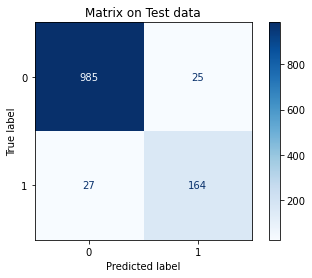

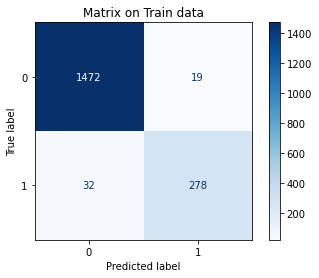

In [21]:
disp = plot_confusion_matrix(knn, x_test, y_test,cmap=plt.cm.Blues)
disp.ax_.set_title('Matrix on Test data')

print(disp.confusion_matrix)

disp1 = plot_confusion_matrix(knn, x_train, y_train,cmap=plt.cm.Blues)
disp1.ax_.set_title('Matrix on Train data')
print(disp1.confusion_matrix)

from sklearn.metrics import classification_report
print('Classification Report on Train data')
print(classification_report(y_train, y_pred_train_knn, target_names=['Ham','Spam']))

print('Classification Report on Test data')
print(classification_report(y_test, y_pred_test_knn, target_names=['Ham','Spam']))

In [22]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes,train_scores,test_scores=learning_curve(knn,x1,y,cv=10,scoring='neg_mean_squared_error',n_jobs=-1,train_sizes=np.linspace(0.1,1,50),verbose=1)

[learning_curve] Training set sizes: [ 270  319  369  418  468  518  567  617  666  716  766  815  865  915
  964 1014 1063 1113 1163 1212 1262 1311 1361 1411 1460 1510 1559 1609
 1659 1708 1758 1808 1857 1907 1956 2006 2056 2105 2155 2204 2254 2304
 2353 2403 2452 2502 2552 2601 2651 2701]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.3min finished


In [23]:
train_sd=np.std(train_scores,axis=1)
train_sd

array([0.00111111, 0.00125392, 0.00162602, 0.00191388, 0.00354984,
       0.00197818, 0.00460247, 0.00226904, 0.00112362, 0.00253329,
       0.00177565, 0.00373982, 0.00239449, 0.00296495, 0.00190148,
       0.00211515, 0.00206961, 0.00166642, 0.00138912, 0.0020478 ,
       0.00189015, 0.00289554, 0.00331862, 0.00353223, 0.00210999,
       0.00366878, 0.0034117 , 0.00312981, 0.00408109, 0.00356567,
       0.00333869, 0.00275218, 0.00375565, 0.00380458, 0.00227548,
       0.00335186, 0.00304367, 0.00301054, 0.00369019, 0.00297836,
       0.00285081, 0.00294404, 0.00283057, 0.00272282, 0.00269322,
       0.00239141, 0.00256833, 0.00249282, 0.00240029, 0.00269254])

In [24]:
train_mn=np.mean(train_scores,axis=1)
train_mn=-train_mn
train_mn

array([0.03296296, 0.0369906 , 0.03306233, 0.02966507, 0.03162393,
       0.03378378, 0.02698413, 0.03533225, 0.03423423, 0.03058659,
       0.03328982, 0.0393865 , 0.03456647, 0.03519126, 0.03651452,
       0.03353057, 0.03254939, 0.0327044 , 0.03379192, 0.03613861,
       0.03494453, 0.03333333, 0.03159442, 0.03231751, 0.02952055,
       0.02986755, 0.02957024, 0.0303294 , 0.02374925, 0.02289227,
       0.02246871, 0.02256637, 0.02229402, 0.02233875, 0.01958078,
       0.01979063, 0.01984436, 0.02033254, 0.02069606, 0.02046279,
       0.02000887, 0.01966146, 0.0200595 , 0.02051602, 0.02108483,
       0.01958433, 0.01873041, 0.01791619, 0.01889853, 0.01854869])

In [25]:
test_sd=np.std(test_scores,axis=1)
test_sd

array([0.00802111, 0.01354638, 0.01116873, 0.00749591, 0.0126225 ,
       0.01232199, 0.01016643, 0.00943229, 0.00907202, 0.00707091,
       0.00918292, 0.01012457, 0.00883837, 0.0087378 , 0.00688486,
       0.00650385, 0.00591726, 0.00612271, 0.00969876, 0.00902077,
       0.00777068, 0.00991033, 0.00887887, 0.00820186, 0.00920715,
       0.00896766, 0.00956032, 0.00843756, 0.00891254, 0.00963851,
       0.01107522, 0.00884828, 0.00907823, 0.0089473 , 0.01024114,
       0.00954819, 0.00909694, 0.00974958, 0.01002084, 0.01019526,
       0.01322351, 0.01262357, 0.01068251, 0.01126571, 0.01180922,
       0.01129248, 0.01152068, 0.01015262, 0.00930578, 0.00834705])

In [26]:
test_mn=np.mean(test_scores,axis=1)
test_mn=-test_mn
test_mn

array([0.06262791, 0.07096346, 0.07062569, 0.07095681, 0.06696013,
       0.05996788, 0.05463898, 0.05596899, 0.05596899, 0.05363234,
       0.05396899, 0.05330233, 0.05230122, 0.05130343, 0.05130343,
       0.04996899, 0.05063234, 0.04996456, 0.050299  , 0.05063012,
       0.05163123, 0.04863455, 0.04963455, 0.04830233, 0.04530454,
       0.04497121, 0.04463787, 0.04430565, 0.04263898, 0.04264009,
       0.04130897, 0.04164009, 0.04097564, 0.03997674, 0.03864341,
       0.03764341, 0.03797896, 0.03731118, 0.03797785, 0.03731118,
       0.03597674, 0.03730897, 0.03697564, 0.03797453, 0.03730897,
       0.03630897, 0.03597564, 0.03630897, 0.03764009, 0.03697342])

Text(0, 0.5, 'Error')

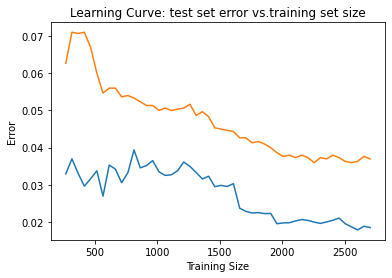

In [27]:
plt.plot(train_sizes,train_mn,label='Training Error')
plt.plot(train_sizes,test_mn,label='CV Error')


plt.title('Learning Curve: test set error vs.training set size')
plt.xlabel('Training Size')
plt.ylabel('Error')
#As the sample size of test increases the error value decreases then becomes constant

In [28]:
#To display 10 most spam indicative words

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1,stop_words='english')
vectorizer2 = CountVectorizer(min_df=1,stop_words='english')

column_n=['Body']
spam_combined_data=pd.DataFrame(columns=column_n)
ham_combined_data=pd.DataFrame(columns=column_n)
spam_clean_data=clean_dataframe(spam_data)
ham_clean_data=clean_dataframe(ham_data)
spam_combined_data['Body']=str(spam_clean_data['Subject'])+spam_clean_data['Body']
ham_combined_data['Body']=str(ham_clean_data['Subject'])+ham_clean_data['Body']

matrix = vectorizer.fit_transform(ham_combined_data['Body'])
counts = pd.DataFrame(matrix.toarray(),
                      columns=vectorizer.get_feature_names())
matrix2 = vectorizer2.fit_transform(spam_combined_data['Body'])
counts2 = pd.DataFrame(matrix2.toarray(),
                      columns=vectorizer2.get_feature_names())

,2496,2497,2498,2499,2500,2501,aa,aaa,aaabc,aaaca,...,zustand,zwcfrk,zygalski,zymm,zyxel,zzew,zzmp,zzzlist,zzzzcc,zzzzteana
0,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2497,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2498,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2499,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [30]:
value_999=counts.sum(axis = 0, skipna = True)
kk=value_999.to_frame(name = "value")
kk.head(20)
kk = kk.drop(labels=['2496','2497','2498','2499','2500','2501'], axis=0)
#kk['count_emails']=0
ind=kk.index
ham_words=list(ind)
word_in_email={}
print(kk)
for word in ham_words:
    #count_ros = ham_data.apply(lambda x: x['Body'].find(word), axis=1)
    #numOfRows = len(count_ros[count_ros == True].index)
    #kk['count_emails']=ham_data['Body'].str.contains(word).value_counts()
    word_in_email[word]=len(ham_combined_data[ham_combined_data['Body'].str.contains(word)])


word_in_email

           value
aa           275
aaa           21
aaabc          1
aaaca          1
aaad           1
...          ...
zzew           1
zzmp           1
zzzlist        5
zzzzcc         2
zzzzteana   7510

[25767 rows x 1 columns]


{'aa': 58,
 'aaa': 4,
 'aaabc': 1,
 'aaaca': 1,
 'aaad': 1,
 'aaae': 1,
 'aaaf': 1,
 'aaaff': 1,
 'aaaffa': 1,
 'aab': 1,
 'aaba': 1,
 'aabadfcd': 1,
 'aabaf': 1,
 'aabbcb': 1,
 'aabc': 1,
 'aabe': 1,
 'aabf': 1,
 'aabfcd': 1,
 'aac': 3,
 'aacaa': 1,
 'aacac': 1,
 'aaccd': 1,
 'aacd': 1,
 'aacdwb': 0,
 'aacgv': 0,
 'aachen': 1,
 'aad': 1,
 'aadafe': 1,
 'aadb': 1,
 'aadc': 1,
 'aadd': 1,
 'aadf': 1,
 'aae': 1,
 'aaea': 1,
 'aaeaf': 1,
 'aaeb': 1,
 'aaecb': 1,
 'aaed': 1,
 'aaef': 1,
 'aaefd': 1,
 'aaf': 1,
 'aafb': 1,
 'aafbac': 1,
 'aafcc': 1,
 'aafda': 1,
 'aafdb': 1,
 'aafe': 1,
 'aaff': 1,
 'aaffde': 1,
 'aalib': 6,
 'aaron': 1,
 'aaronsw': 1,
 'aavid': 0,
 'aaxine': 3,
 'ab': 1306,
 'aba': 80,
 'abaa': 1,
 'ababef': 1,
 'abac': 1,
 'abacafecf': 1,
 'abae': 1,
 'abaef': 1,
 'abaf': 1,
 'abandon': 11,
 'abandoned': 7,
 'abandoning': 1,
 'abb': 84,
 'abbab': 1,
 'abbc': 1,
 'abbcc': 1,
 'abbdce': 1,
 'abbey': 0,
 'abbf': 1,
 'abbreviated': 1,
 'abbreviation': 1,
 'abc': 2,
 'abca': 1

,496,497,498,499,500,501,aa,aaa,aaaaaa,aaaaaaaaaa,...,zzwdu,zzxogcy,zzxr,zzyp,zzz,zzzdk,zzzz,zzzzason,zzzzotm,zzzzx
0,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
value_1=counts2.sum(axis = 0, skipna = True)
k1=value_1.to_frame(name = "value")
k1 = k1.drop(labels=['496','497','498','499','500','501'], axis=0)
inde=k1.index
spam_words=list(inde)
words_in_email={}
for word in spam_words:
    words_in_email[word]=len(spam_combined_data[spam_combined_data['Body'].str.contains(word)])

words_in_email

{'aa': 10,
 'aaa': 2,
 'aaaaaa': 0,
 'aaaaaaaaaa': 0,
 'aaaaaaaaaaa': 0,
 'aaaaaaaaaaaaaaaaaaaaaaaaaaa': 0,
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa': 0,
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa': 0,
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa': 0,
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaacuxrmplf': 0,
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaac': 0,
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaacu': 0,
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaabc': 0,
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaacuxrmplf': 0,
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaafcvwyfk': 0,
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaacuxrmplf': 0,
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaacnlzcun': 0,
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaac': 0,
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa

In [34]:
import operator

prob={}
for x in spam_words:
    if x in ham_words:
        prob[x]=np.log((words_in_email[x]/3002)/0.166)-np.log((word_in_email[x]/2501)/3002)


sorted_d = dict( sorted(prob.items(), key=operator.itemgetter(1),reverse=True))
print(sorted_d)

<ipython-input-34-3f4e12e1e7eb>:6: RuntimeWarning: divide by zero encountered in log
  prob[x]=np.log((words_in_email[x]/3002)/0.166)-np.log((word_in_email[x]/2501)/3002)
<ipython-input-34-3f4e12e1e7eb>:6: RuntimeWarning: invalid value encountered in double_scalars
  prob[x]=np.log((words_in_email[x]/3002)/0.166)-np.log((word_in_email[x]/2501)/3002)


{'abuses': inf, 'accessories': inf, 'attitudes': inf, 'deux': inf, 'assistance': 11.63511644204548, 'buyers': 11.006507782623103, 'attorney': 10.919496405633474, 'accrued': 10.718825710171322, 'associates': 10.718825710171322, 'auctions': 10.718825710171322, 'cafeteria': 10.718825710171322, 'cabinet': 10.31336060206316, 'aab': 10.313360602063158, 'aad': 10.313360602063158, 'aae': 10.313360602063158, 'abf': 10.313360602063158, 'acd': 10.313360602063158, 'caa': 10.313360602063158, 'cae': 10.313360602063158, 'buyer': 10.090217050748947, 'accepted': 9.968520115771428, 'buying': 9.925595071054396, 'absolutely': 9.876146795640413, 'abc': 9.620213421503214, 'accountability': 9.620213421503214, 'acknowledged': 9.620213421503214, 'aadb': 9.620213421503212, 'aaed': 9.620213421503212, 'abdc': 9.620213421503212, 'abdd': 9.620213421503212, 'abide': 9.620213421503212, 'acb': 9.620213421503212, 'acca': 9.620213421503212, 'accommodations': 9.620213421503212, 'achieved': 9.620213421503212, 'achieves': 

In [35]:
from itertools import islice

def take(n, sorted_d):
    "Return first n items of the iterable as a list"
    return list(islice(sorted_d, n))
print('Words that are more indicative of spam :')
print(take(10,sorted_d))

Words that are more indicative of spam :
['abuses', 'accessories', 'attitudes', 'deux', 'assistance', 'buyers', 'attorney', 'accrued', 'associates', 'auctions']
